In [41]:
import os
HOCKEY_PATH = os.path.join("datasets", "hockey")

In [42]:
import pandas as pd

def load_hockey_data(hockey_path=HOCKEY_PATH):
    csv_path = os.path.join(hockey_path, "my_csv_export.csv")
    return pd.read_csv(csv_path)

In [43]:
hockey = load_hockey_data()
hockey.head()

DataTime    Хозяева             Время Х     Гости        Время Г
0  04-10-2018    Торонто            12 38 61  Монреаль           9 39
1  04-10-2018  Вашингтон  1 2 24 26 27 35 50    Бостон            NaN
2  04-10-2018   Ванкувер      13 41 42 45 59   Калгари          43 48
3  04-10-2018   Сан-Хосе                7 37   Анахайм  1 38 48 50 59
4  05-10-2018    Баффало                 NaN    Бостон     6 15 36 59

In [44]:
hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 5 columns):
DataTime    725 non-null object
Хозяева     725 non-null object
Время Х     693 non-null object
Гости       725 non-null object
Время Г     679 non-null object
dtypes: object(5)
memory usage: 28.4+ KB


In [45]:
hockey["Время Х"].value_counts()

26                      9
12                      7
27                      4
11                      4
32                      4
37                      4
41                      3
38                      3
9                       3
1                       3
58                      3
16                      3
56                      3
27 36                   2
42                      2
14                      2
3 31                    2
49                      2
17 38                   2
52                      2
34                      2
43                      2
11 35                   2
57                      2
21                      2
53                      2
17 21                   2
15                      2
36                      2
48                      2
                       ..
2 19 33                 1
1 5 28                  1
8 11 46                 1
10 11 47 58 59          1
11 28 37 41 44 46       1
6 39 44 59              1
15 18 23 28 30 56       1
5 15 16 23 5

In [46]:
hockey.describe()

DataTime   Хозяева Время Х  Гости Время Г
count          725       725     693    725     679
unique         103        31     634     31     607
top     24-11-2018  Виннипег      26  Вегас      46
freq            15        26       9     27       6

In [47]:
def count1P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) < 20 and int(i) != -1:
                count += 1
    return count

In [48]:
def count2P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 19 and int(i) < 40 and int(i) != -1:
                count += 1
    return count

In [49]:
def count3P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 39 and int(i) < 60 and int(i) != -1:
                count += 1
    return count

In [50]:
def countOT(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 59 and int(i) != -1:
                count += 1
    return count

In [51]:
def countSS(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) == -1:
                count += 1
    return count

In [52]:
hockey['1PHosts'] = hockey['Время Х'].str.split(" ").apply(count1P)

In [53]:
hockey['2PHosts'] = hockey['Время Х'].str.split(" ").apply(count2P)

In [54]:
hockey['3PHosts'] = hockey['Время Х'].str.split(" ").apply(count3P)

In [55]:
hockey['OTHosts'] = hockey['Время Х'].str.split(" ").apply(countOT)

In [56]:
hockey['SSHosts'] = hockey['Время Х'].str.split(" ").apply(countSS)

In [57]:
hockey['CountHosts'] = hockey['SSHosts'] + hockey['OTHosts'] + hockey['3PHosts'] + hockey['2PHosts'] + hockey['1PHosts'] 

In [58]:
hockey.describe()

1PHosts     2PHosts     3PHosts     OTHosts     SSHosts  CountHosts
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000
mean     0.977931    1.107586    1.077241    0.067586    0.023448    3.253793
std      0.963166    1.035028    1.094735    0.251208    0.151427    1.783636
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    2.000000
50%      1.000000    1.000000    1.000000    0.000000    0.000000    3.000000
75%      1.000000    2.000000    2.000000    0.000000    0.000000    4.000000
max      5.000000    5.000000    5.000000    1.000000    1.000000    9.000000

In [59]:
hockey.head()

DataTime    Хозяева             Время Х     Гости        Время Г  \
0  04-10-2018    Торонто            12 38 61  Монреаль           9 39   
1  04-10-2018  Вашингтон  1 2 24 26 27 35 50    Бостон            NaN   
2  04-10-2018   Ванкувер      13 41 42 45 59   Калгари          43 48   
3  04-10-2018   Сан-Хосе                7 37   Анахайм  1 38 48 50 59   
4  05-10-2018    Баффало                 NaN    Бостон     6 15 36 59   

   1PHosts  2PHosts  3PHosts  OTHosts  SSHosts  CountHosts  
0        1        1        0        1        0           3  
1        2        4        1        0        0           7  
2        1        0        4        0        0           5  
3        1        1        0        0        0           2  
4        0        0        0        0        0           0

In [60]:
hockey.head(-1)

DataTime       Хозяева                  Время Х         Гости  \
0    04-10-2018       Торонто                 12 38 61      Монреаль   
1    04-10-2018     Вашингтон       1 2 24 26 27 35 50        Бостон   
2    04-10-2018      Ванкувер           13 41 42 45 59       Калгари   
3    04-10-2018      Сан-Хосе                     7 37       Анахайм   
4    05-10-2018       Баффало                      NaN        Бостон   
5    05-10-2018     Питтсбург       1 7 21 35 36 42 61     Вашингтон   
6    05-10-2018      Каролина                       58     Айлендерс   
7    05-10-2018       Детройт                    27 36      Коламбус   
8    05-10-2018        Оттава                  6 12 16        Чикаго   
9    05-10-2018     Рейнджерс                    27 59       Нэшвилл   
10   05-10-2018     Сент-Луис                       54      Виннипег   
11   05-10-2018        Даллас                 24 24 25       Аризона   
12   05-10-2018      Колорадо              12 30 58 59     Миннесота   
13   05-10-2018         Вегас                     6 48   Филадельфия   
14   06-10-2018      Коламбус                       12      Каролина   
15   06-10-2018  Лос-Анджелес                    17 21      Сан-Хосе   
16   06-10-2018    Нью-Джерси            1 22 23 45 58      Эдмонтон   
17   07-10-2018        Даллас            8 11 27 47 52      Виннипег   
18   07-10-2018     Тампа-Бэй                    50 -1       Флорида   
19   07-10-2018       Баффало                 13 21 59     Рейнджерс   
20   07-10-2018     Айлендерс                 12 22 39       Нэшвилл   
21   07-10-2018       Торонто                 21 22 38        Оттава   
22   07-10-2018     Питтсбург                       37      Монреаль   
23   07-10-2018     Сент-Луис              14 17 43 44        Чикаго   
24   07-10-2018     Миннесота                        9         Вегас   
25   07-10-2018       Аризона                      NaN       Анахайм   
26   07-10-2018      Колорадо            1 12 27 56 58   Филадельфия   
27   07-10-2018       Калгари      1 17 29 49 54 58 59      Ванкувер   
28   08-10-2018      Каролина   9 14 29 39 45 50 51 59     Рейнджерс   
29   08-10-2018        Чикаго         9 12 25 42 58 59       Торонто   
..          ...           ...                      ...           ...   
694  13-01-2019        Даллас                       48     Сент-Луис   
695  13-01-2019      Эдмонтон                     6 36       Аризона   
696  13-01-2019      Сан-Хосе              37 46 55 58        Оттава   
697  13-01-2019  Лос-Анджелес           10 28 36 41 59     Питтсбург   
698  13-01-2019      Каролина        15 18 23 28 30 56       Нэшвилл   
699  14-01-2019      Виннипег              19 22 54 64       Анахайм   
700  14-01-2019      Коламбус       5 8 34 37 39 45 58     Рейнджерс   
701  14-01-2019     Айлендерс              1 4 4 31 59     Тампа-Бэй   
702  14-01-2019      Ванкувер           32 47 57 59 59       Флорида   
703  14-01-2019       Калгари     16 17 21 37 44 46 47       Аризона   
704  15-01-2019     Вашингтон                        7     Сент-Луис   
705  15-01-2019    Нью-Джерси  13 25 28 30 34 37 48 59        Чикаго   
706  15-01-2019       Торонто                 22 23 46      Колорадо   
707  15-01-2019   Филадельфия     12 18 24 35 39 50 58     Миннесота   
708  15-01-2019        Бостон                    14 59      Монреаль   
709  15-01-2019      Эдмонтон        2 3 4 21 24 43 45       Баффало   
710  16-01-2019      Коламбус                1 2 17 21    Нью-Джерси   
711  16-01-2019     Айлендерс                     8 61     Сент-Луис   
712  16-01-2019     Рейнджерс         1 12 14 23 44 52      Каролина   
713  16-01-2019       Детройт                 45 55 57       Анахайм   
714  16-01-2019      Монреаль           21 30 36 54 58       Флорида   
715  16-01-2019      Виннипег              25 36 58 59         Вегас   
716  16-01-2019       Нэшвилл      3 10 21 32 34 39 47     Вашингтон   
717  16-01-2019     Миннесота                 3

In [61]:
hockey.describe()

1PHosts     2PHosts     3PHosts     OTHosts     SSHosts  CountHosts
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000
mean     0.977931    1.107586    1.077241    0.067586    0.023448    3.253793
std      0.963166    1.035028    1.094735    0.251208    0.151427    1.783636
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    2.000000
50%      1.000000    1.000000    1.000000    0.000000    0.000000    3.000000
75%      1.000000    2.000000    2.000000    0.000000    0.000000    4.000000
max      5.000000    5.000000    5.000000    1.000000    1.000000    9.000000

In [62]:
hockey['1PGuests'] = hockey['Время Г'].str.split(" ").apply(count1P)

In [63]:
hockey['2PGuests'] = hockey['Время Г'].str.split(" ").apply(count2P)

In [64]:
hockey['3PGuests'] = hockey['Время Г'].str.split(" ").apply(count3P)

In [65]:
hockey['OTGuests'] = hockey['Время Г'].str.split(" ").apply(countOT)

In [66]:
hockey['SSGuests'] = hockey['Время Г'].str.split(" ").apply(countSS)

In [67]:
hockey['CountGuests'] = hockey['SSGuests'] + hockey['OTGuests'] + hockey['3PGuests'] + hockey['2PGuests'] + hockey['1PGuests'] 

In [68]:
hockey.head(-1)

DataTime       Хозяева                  Время Х         Гости  \
0    04-10-2018       Торонто                 12 38 61      Монреаль   
1    04-10-2018     Вашингтон       1 2 24 26 27 35 50        Бостон   
2    04-10-2018      Ванкувер           13 41 42 45 59       Калгари   
3    04-10-2018      Сан-Хосе                     7 37       Анахайм   
4    05-10-2018       Баффало                      NaN        Бостон   
5    05-10-2018     Питтсбург       1 7 21 35 36 42 61     Вашингтон   
6    05-10-2018      Каролина                       58     Айлендерс   
7    05-10-2018       Детройт                    27 36      Коламбус   
8    05-10-2018        Оттава                  6 12 16        Чикаго   
9    05-10-2018     Рейнджерс                    27 59       Нэшвилл   
10   05-10-2018     Сент-Луис                       54      Виннипег   
11   05-10-2018        Даллас                 24 24 25       Аризона   
12   05-10-2018      Колорадо              12 30 58 59     Миннесота   
13   05-10-2018         Вегас                     6 48   Филадельфия   
14   06-10-2018      Коламбус                       12      Каролина   
15   06-10-2018  Лос-Анджелес                    17 21      Сан-Хосе   
16   06-10-2018    Нью-Джерси            1 22 23 45 58      Эдмонтон   
17   07-10-2018        Даллас            8 11 27 47 52      Виннипег   
18   07-10-2018     Тампа-Бэй                    50 -1       Флорида   
19   07-10-2018       Баффало                 13 21 59     Рейнджерс   
20   07-10-2018     Айлендерс                 12 22 39       Нэшвилл   
21   07-10-2018       Торонто                 21 22 38        Оттава   
22   07-10-2018     Питтсбург                       37      Монреаль   
23   07-10-2018     Сент-Луис              14 17 43 44        Чикаго   
24   07-10-2018     Миннесота                        9         Вегас   
25   07-10-2018       Аризона                      NaN       Анахайм   
26   07-10-2018      Колорадо            1 12 27 56 58   Филадельфия   
27   07-10-2018       Калгари      1 17 29 49 54 58 59      Ванкувер   
28   08-10-2018      Каролина   9 14 29 39 45 50 51 59     Рейнджерс   
29   08-10-2018        Чикаго         9 12 25 42 58 59       Торонто   
..          ...           ...                      ...           ...   
694  13-01-2019        Даллас                       48     Сент-Луис   
695  13-01-2019      Эдмонтон                     6 36       Аризона   
696  13-01-2019      Сан-Хосе              37 46 55 58        Оттава   
697  13-01-2019  Лос-Анджелес           10 28 36 41 59     Питтсбург   
698  13-01-2019      Каролина        15 18 23 28 30 56       Нэшвилл   
699  14-01-2019      Виннипег              19 22 54 64       Анахайм   
700  14-01-2019      Коламбус       5 8 34 37 39 45 58     Рейнджерс   
701  14-01-2019     Айлендерс              1 4 4 31 59     Тампа-Бэй   
702  14-01-2019      Ванкувер           32 47 57 59 59       Флорида   
703  14-01-2019       Калгари     16 17 21 37 44 46 47       Аризона   
704  15-01-2019     Вашингтон                        7     Сент-Луис   
705  15-01-2019    Нью-Джерси  13 25 28 30 34 37 48 59        Чикаго   
706  15-01-2019       Торонто                 22 23 46      Колорадо   
707  15-01-2019   Филадельфия     12 18 24 35 39 50 58     Миннесота   
708  15-01-2019        Бостон                    14 59      Монреаль   
709  15-01-2019      Эдмонтон        2 3 4 21 24 43 45       Баффало   
710  16-01-2019      Коламбус                1 2 17 21    Нью-Джерси   
711  16-01-2019     Айлендерс                     8 61     Сент-Луис   
712  16-01-2019     Рейнджерс         1 12 14 23 44 52      Каролина   
713  16-01-2019       Детройт                 45 55 57       Анахайм   
714  16-01-2019      Монреаль           21 30 36 54 58       Флорида   
715  16-01-2019      Виннипег              25 36 58 59         Вегас   
716  16-01-2019       Нэшвилл      3 10 21 32 34 39 47     Вашингтон   
717  16-01-2019     Миннесота                 3

In [69]:
new_hockey = hockey[["DataTime","Хозяева","Гости","1PHosts","2PHosts","3PHosts","OTHosts","SSHosts","CountHosts","1PGuests" ,"2PGuests","3PGuests","OTGuests","SSGuests","CountGuests"]]

In [70]:
new_hockey.head(-1)

DataTime       Хозяева         Гости  1PHosts  2PHosts  3PHosts  \
0    04-10-2018       Торонто      Монреаль        1        1        0   
1    04-10-2018     Вашингтон        Бостон        2        4        1   
2    04-10-2018      Ванкувер       Калгари        1        0        4   
3    04-10-2018      Сан-Хосе       Анахайм        1        1        0   
4    05-10-2018       Баффало        Бостон        0        0        0   
5    05-10-2018     Питтсбург     Вашингтон        2        3        1   
6    05-10-2018      Каролина     Айлендерс        0        0        1   
7    05-10-2018       Детройт      Коламбус        0        2        0   
8    05-10-2018        Оттава        Чикаго        3        0        0   
9    05-10-2018     Рейнджерс       Нэшвилл        0        1        1   
10   05-10-2018     Сент-Луис      Виннипег        0        0        1   
11   05-10-2018        Даллас       Аризона        0        3        0   
12   05-10-2018      Колорадо     Миннесота        1        1        2   
13   05-10-2018         Вегас   Филадельфия        1        0        1   
14   06-10-2018      Коламбус      Каролина        1        0        0   
15   06-10-2018  Лос-Анджелес      Сан-Хосе        1        1        0   
16   06-10-2018    Нью-Джерси      Эдмонтон        1        2        2   
17   07-10-2018        Даллас      Виннипег        2        1        2   
18   07-10-2018     Тампа-Бэй       Флорида        0        0        1   
19   07-10-2018       Баффало     Рейнджерс        1        1        1   
20   07-10-2018     Айлендерс       Нэшвилл        1        2        0   
21   07-10-2018       Торонто        Оттава        0        3        0   
22   07-10-2018     Питтсбург      Монреаль        0        1        0   
23   07-10-2018     Сент-Луис        Чикаго        2        0        2   
24   07-10-2018     Миннесота         Вегас        1        0        0   
25   07-10-2018       Аризона       Анахайм        0        0        0   
26   07-10-2018      Колорадо   Филадельфия        2        1        2   
27   07-10-2018       Калгари      Ванкувер        2        1        4   
28   08-10-2018      Каролина     Рейнджерс        2        2        4   
29   08-10-2018        Чикаго       Торонто        2        1        3   
..          ...           ...           ...      ...      ...      ...   
694  13-01-2019        Даллас     Сент-Луис        0        0        1   
695  13-01-2019      Эдмонтон       Аризона        1        1        0   
696  13-01-2019      Сан-Хосе        Оттава        0        1        3   
697  13-01-2019  Лос-Анджелес     Питтсбург        1        2        2   
698  13-01-2019      Каролина       Нэшвилл        2        3        1   
699  14-01-2019      Виннипег       Анахайм        1        1        1   
700  14-01-2019      Коламбус     Рейнджерс        2        3        2   
701  14-01-2019     Айлендерс     Тампа-Бэй        3        1        1   
702  14-01-2019      Ванкувер       Флорида        0        1        4   
703  14-01-2019       Калгари       Аризона        2        2        3   
704  15-01-2019     Вашингтон     Сент-Луис        1        0        0   
705  15-01-2019    Нью-Джерси        Чикаго        1        5        2   
706  15-01-2019       Торонто      Колорадо        0        2        1   
707  15-01-2019   Филадельфия     Миннесота        2        3        2   
708  15-01-2019        Бостон      Монреаль        1        0        1   
709  15-01-2019      Эдмонтон       Баффало        3        2        2   
710  16-01-2019      Коламбус    Нью-Джерси        3        1        0   
711  16-01-2019     Айлендерс     Сент-Луис        1        0        0   
712  16-01-2019     Рейнджерс      Каролина        3        1        2   
713  16-01-2019       Детройт       Анахайм        0        0        3   
714  16-01-2019      Монреаль       Флорида        0        3        2   
715  16-01-2019      Виннипег         Вегас        0        2        2   
716  16-01-

In [71]:
new_hockey = new_hockey.rename(columns={'Хозяева': 'Hosts', 'Гости': 'Guests'})

In [72]:
new_hockey.head(-1)

DataTime         Hosts        Guests  1PHosts  2PHosts  3PHosts  \
0    04-10-2018       Торонто      Монреаль        1        1        0   
1    04-10-2018     Вашингтон        Бостон        2        4        1   
2    04-10-2018      Ванкувер       Калгари        1        0        4   
3    04-10-2018      Сан-Хосе       Анахайм        1        1        0   
4    05-10-2018       Баффало        Бостон        0        0        0   
5    05-10-2018     Питтсбург     Вашингтон        2        3        1   
6    05-10-2018      Каролина     Айлендерс        0        0        1   
7    05-10-2018       Детройт      Коламбус        0        2        0   
8    05-10-2018        Оттава        Чикаго        3        0        0   
9    05-10-2018     Рейнджерс       Нэшвилл        0        1        1   
10   05-10-2018     Сент-Луис      Виннипег        0        0        1   
11   05-10-2018        Даллас       Аризона        0        3        0   
12   05-10-2018      Колорадо     Миннесота        1        1        2   
13   05-10-2018         Вегас   Филадельфия        1        0        1   
14   06-10-2018      Коламбус      Каролина        1        0        0   
15   06-10-2018  Лос-Анджелес      Сан-Хосе        1        1        0   
16   06-10-2018    Нью-Джерси      Эдмонтон        1        2        2   
17   07-10-2018        Даллас      Виннипег        2        1        2   
18   07-10-2018     Тампа-Бэй       Флорида        0        0        1   
19   07-10-2018       Баффало     Рейнджерс        1        1        1   
20   07-10-2018     Айлендерс       Нэшвилл        1        2        0   
21   07-10-2018       Торонто        Оттава        0        3        0   
22   07-10-2018     Питтсбург      Монреаль        0        1        0   
23   07-10-2018     Сент-Луис        Чикаго        2        0        2   
24   07-10-2018     Миннесота         Вегас        1        0        0   
25   07-10-2018       Аризона       Анахайм        0        0        0   
26   07-10-2018      Колорадо   Филадельфия        2        1        2   
27   07-10-2018       Калгари      Ванкувер        2        1        4   
28   08-10-2018      Каролина     Рейнджерс        2        2        4   
29   08-10-2018        Чикаго       Торонто        2        1        3   
..          ...           ...           ...      ...      ...      ...   
694  13-01-2019        Даллас     Сент-Луис        0        0        1   
695  13-01-2019      Эдмонтон       Аризона        1        1        0   
696  13-01-2019      Сан-Хосе        Оттава        0        1        3   
697  13-01-2019  Лос-Анджелес     Питтсбург        1        2        2   
698  13-01-2019      Каролина       Нэшвилл        2        3        1   
699  14-01-2019      Виннипег       Анахайм        1        1        1   
700  14-01-2019      Коламбус     Рейнджерс        2        3        2   
701  14-01-2019     Айлендерс     Тампа-Бэй        3        1        1   
702  14-01-2019      Ванкувер       Флорида        0        1        4   
703  14-01-2019       Калгари       Аризона        2        2        3   
704  15-01-2019     Вашингтон     Сент-Луис        1        0        0   
705  15-01-2019    Нью-Джерси        Чикаго        1        5        2   
706  15-01-2019       Торонто      Колорадо        0        2        1   
707  15-01-2019   Филадельфия     Миннесота        2        3        2   
708  15-01-2019        Бостон      Монреаль        1        0        1   
709  15-01-2019      Эдмонтон       Баффало        3        2        2   
710  16-01-2019      Коламбус    Нью-Джерси        3        1        0   
711  16-01-2019     Айлендерс     Сент-Луис        1        0        0   
712  16-01-2019     Рейнджерс      Каролина        3        1        2   
713  16-01-2019       Детройт       Анахайм        0        0        3   
714  16-01-2019      Монреаль       Флорида        0        3        2   
715  16-01-2019      Виннипег         Вегас        0        2        2   
716  16-01-

In [73]:
new_new_hockey = new_hockey.copy()

In [74]:
new_new_hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 15 columns):
DataTime       725 non-null object
Hosts          725 non-null object
Guests         725 non-null object
1PHosts        725 non-null int64
2PHosts        725 non-null int64
3PHosts        725 non-null int64
OTHosts        725 non-null int64
SSHosts        725 non-null int64
CountHosts     725 non-null int64
1PGuests       725 non-null int64
2PGuests       725 non-null int64
3PGuests       725 non-null int64
OTGuests       725 non-null int64
SSGuests       725 non-null int64
CountGuests    725 non-null int64
dtypes: int64(12), object(3)
memory usage: 85.0+ KB


In [75]:
new_new_hockey.head(-1)

DataTime         Hosts        Guests  1PHosts  2PHosts  3PHosts  \
0    04-10-2018       Торонто      Монреаль        1        1        0   
1    04-10-2018     Вашингтон        Бостон        2        4        1   
2    04-10-2018      Ванкувер       Калгари        1        0        4   
3    04-10-2018      Сан-Хосе       Анахайм        1        1        0   
4    05-10-2018       Баффало        Бостон        0        0        0   
5    05-10-2018     Питтсбург     Вашингтон        2        3        1   
6    05-10-2018      Каролина     Айлендерс        0        0        1   
7    05-10-2018       Детройт      Коламбус        0        2        0   
8    05-10-2018        Оттава        Чикаго        3        0        0   
9    05-10-2018     Рейнджерс       Нэшвилл        0        1        1   
10   05-10-2018     Сент-Луис      Виннипег        0        0        1   
11   05-10-2018        Даллас       Аризона        0        3        0   
12   05-10-2018      Колорадо     Миннесота        1        1        2   
13   05-10-2018         Вегас   Филадельфия        1        0        1   
14   06-10-2018      Коламбус      Каролина        1        0        0   
15   06-10-2018  Лос-Анджелес      Сан-Хосе        1        1        0   
16   06-10-2018    Нью-Джерси      Эдмонтон        1        2        2   
17   07-10-2018        Даллас      Виннипег        2        1        2   
18   07-10-2018     Тампа-Бэй       Флорида        0        0        1   
19   07-10-2018       Баффало     Рейнджерс        1        1        1   
20   07-10-2018     Айлендерс       Нэшвилл        1        2        0   
21   07-10-2018       Торонто        Оттава        0        3        0   
22   07-10-2018     Питтсбург      Монреаль        0        1        0   
23   07-10-2018     Сент-Луис        Чикаго        2        0        2   
24   07-10-2018     Миннесота         Вегас        1        0        0   
25   07-10-2018       Аризона       Анахайм        0        0        0   
26   07-10-2018      Колорадо   Филадельфия        2        1        2   
27   07-10-2018       Калгари      Ванкувер        2        1        4   
28   08-10-2018      Каролина     Рейнджерс        2        2        4   
29   08-10-2018        Чикаго       Торонто        2        1        3   
..          ...           ...           ...      ...      ...      ...   
694  13-01-2019        Даллас     Сент-Луис        0        0        1   
695  13-01-2019      Эдмонтон       Аризона        1        1        0   
696  13-01-2019      Сан-Хосе        Оттава        0        1        3   
697  13-01-2019  Лос-Анджелес     Питтсбург        1        2        2   
698  13-01-2019      Каролина       Нэшвилл        2        3        1   
699  14-01-2019      Виннипег       Анахайм        1        1        1   
700  14-01-2019      Коламбус     Рейнджерс        2        3        2   
701  14-01-2019     Айлендерс     Тампа-Бэй        3        1        1   
702  14-01-2019      Ванкувер       Флорида        0        1        4   
703  14-01-2019       Калгари       Аризона        2        2        3   
704  15-01-2019     Вашингтон     Сент-Луис        1        0        0   
705  15-01-2019    Нью-Джерси        Чикаго        1        5        2   
706  15-01-2019       Торонто      Колорадо        0        2        1   
707  15-01-2019   Филадельфия     Миннесота        2        3        2   
708  15-01-2019        Бостон      Монреаль        1        0        1   
709  15-01-2019      Эдмонтон       Баффало        3        2        2   
710  16-01-2019      Коламбус    Нью-Джерси        3        1        0   
711  16-01-2019     Айлендерс     Сент-Луис        1        0        0   
712  16-01-2019     Рейнджерс      Каролина        3        1        2   
713  16-01-2019       Детройт       Анахайм        0        0        3   
714  16-01-2019      Монреаль       Флорида        0        3        2   
715  16-01-2019      Виннипег         Вегас        0        2        2   
716  16-01-

In [78]:
new_new_hockey['DataTime'] =  pd.to_datetime(new_new_hockey['DataTime'], format='%d-%m-%Y')

In [79]:
new_new_hockey.head(-1)

DataTime         Hosts        Guests  1PHosts  2PHosts  3PHosts  \
0   2018-10-04       Торонто      Монреаль        1        1        0   
1   2018-10-04     Вашингтон        Бостон        2        4        1   
2   2018-10-04      Ванкувер       Калгари        1        0        4   
3   2018-10-04      Сан-Хосе       Анахайм        1        1        0   
4   2018-10-05       Баффало        Бостон        0        0        0   
5   2018-10-05     Питтсбург     Вашингтон        2        3        1   
6   2018-10-05      Каролина     Айлендерс        0        0        1   
7   2018-10-05       Детройт      Коламбус        0        2        0   
8   2018-10-05        Оттава        Чикаго        3        0        0   
9   2018-10-05     Рейнджерс       Нэшвилл        0        1        1   
10  2018-10-05     Сент-Луис      Виннипег        0        0        1   
11  2018-10-05        Даллас       Аризона        0        3        0   
12  2018-10-05      Колорадо     Миннесота        1        1        2   
13  2018-10-05         Вегас   Филадельфия        1        0        1   
14  2018-10-06      Коламбус      Каролина        1        0        0   
15  2018-10-06  Лос-Анджелес      Сан-Хосе        1        1        0   
16  2018-10-06    Нью-Джерси      Эдмонтон        1        2        2   
17  2018-10-07        Даллас      Виннипег        2        1        2   
18  2018-10-07     Тампа-Бэй       Флорида        0        0        1   
19  2018-10-07       Баффало     Рейнджерс        1        1        1   
20  2018-10-07     Айлендерс       Нэшвилл        1        2        0   
21  2018-10-07       Торонто        Оттава        0        3        0   
22  2018-10-07     Питтсбург      Монреаль        0        1        0   
23  2018-10-07     Сент-Луис        Чикаго        2        0        2   
24  2018-10-07     Миннесота         Вегас        1        0        0   
25  2018-10-07       Аризона       Анахайм        0        0        0   
26  2018-10-07      Колорадо   Филадельфия        2        1        2   
27  2018-10-07       Калгари      Ванкувер        2        1        4   
28  2018-10-08      Каролина     Рейнджерс        2        2        4   
29  2018-10-08        Чикаго       Торонто        2        1        3   
..         ...           ...           ...      ...      ...      ...   
694 2019-01-13        Даллас     Сент-Луис        0        0        1   
695 2019-01-13      Эдмонтон       Аризона        1        1        0   
696 2019-01-13      Сан-Хосе        Оттава        0        1        3   
697 2019-01-13  Лос-Анджелес     Питтсбург        1        2        2   
698 2019-01-13      Каролина       Нэшвилл        2        3        1   
699 2019-01-14      Виннипег       Анахайм        1        1        1   
700 2019-01-14      Коламбус     Рейнджерс        2        3        2   
701 2019-01-14     Айлендерс     Тампа-Бэй        3        1        1   
702 2019-01-14      Ванкувер       Флорида        0        1        4   
703 2019-01-14       Калгари       Аризона        2        2        3   
704 2019-01-15     Вашингтон     Сент-Луис        1        0        0   
705 2019-01-15    Нью-Джерси        Чикаго        1        5        2   
706 2019-01-15       Торонто      Колорадо        0        2        1   
707 2019-01-15   Филадельфия     Миннесота        2        3        2   
708 2019-01-15        Бостон      Монреаль        1        0        1   
709 2019-01-15      Эдмонтон       Баффало        3        2        2   
710 2019-01-16      Коламбус    Нью-Джерси        3        1        0   
711 2019-01-16     Айлендерс     Сент-Луис        1        0        0   
712 2019-01-16     Рейнджерс      Каролина        3        1        2   
713 2019-01-16       Детройт       Анахайм        0        0        3   
714 2019-01-16      Монреаль       Флорида        0        3        2   
715 2019-01-16      Виннипег         Вегас        0        2        2   
716 2019-01-16       Нэшвилл     Вашингтон        2        4    

In [80]:
new_new_hockey.to_csv(os.path.join("datasets", "hockey", "new_hockey_2019_01_18.csv"), sep=',', encoding='utf-8', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011809080>]],
      dtype=object)

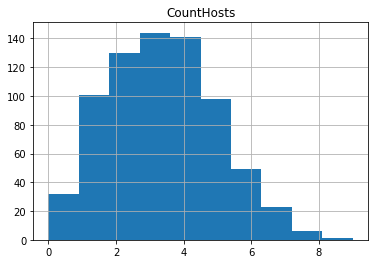

In [81]:
new_new_hockey[["DataTime","CountHosts"]].hist()

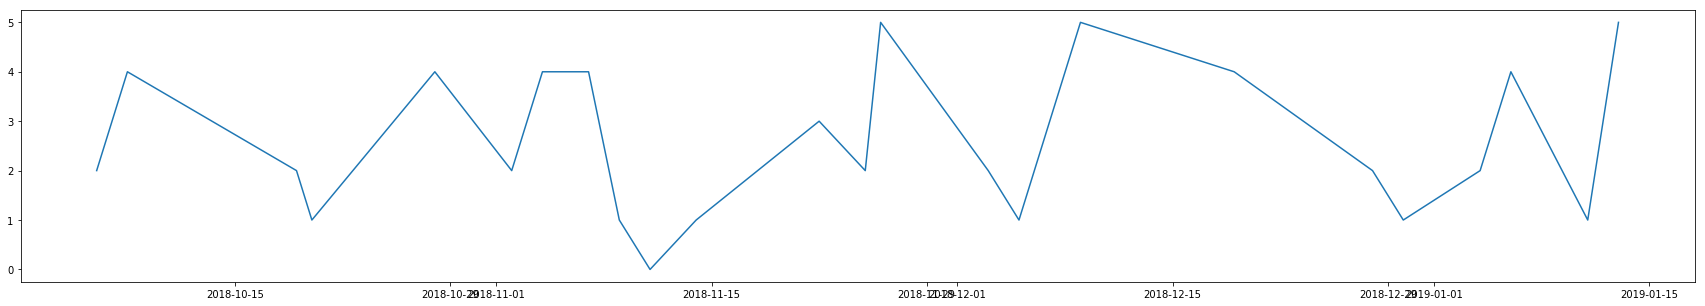

In [114]:
data = new_new_hockey[["DataTime", "CountHosts"]].where(new_new_hockey["Hosts"] == "Лос-Анджелес")
data = data.dropna()
plt.figure(figsize=(30,5))
plt.plot(data["DataTime"], data["CountHosts"])

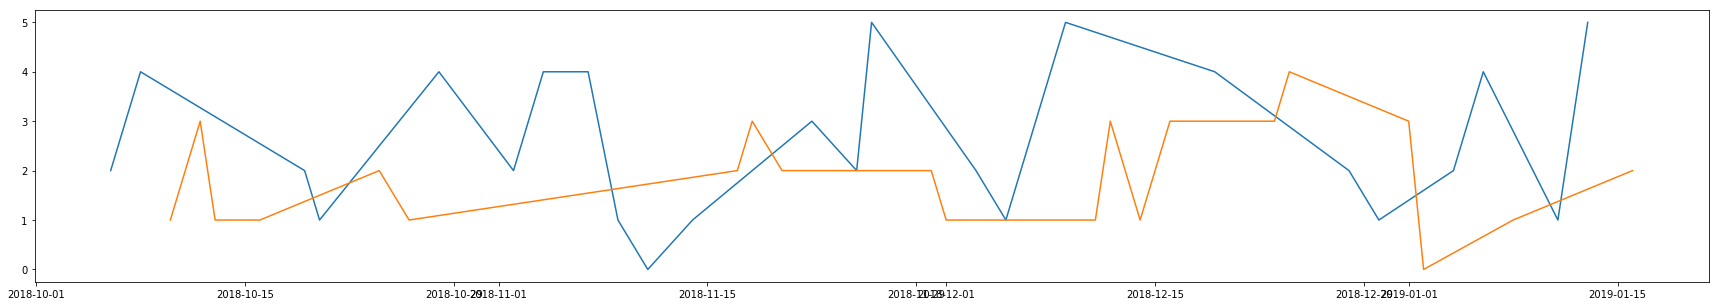

In [115]:
data = new_new_hockey[["DataTime", "CountHosts"]].where(new_new_hockey["Hosts"] == "Лос-Анджелес")
data2 = new_new_hockey[["DataTime", "CountGuests"]].where(new_new_hockey["Guests"] == "Лос-Анджелес")
data = data.dropna()
data2 = data2.dropna()
plt.figure(figsize=(30,5))
plt.plot(data["DataTime"], data["CountHosts"], data2["DataTime"] ,data2["CountGuests"])


In [116]:
new_new_hockey.to_csv(os.path.join("datasets", "hockey", "new_hockey_2019_01_18.csv"), sep=',', encoding='utf-8', index=False)